In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
import pandas as pd

In [3]:
data = pd.read_csv("ObservationData_vhltxod.csv.gz")

In [4]:
data['year'] = data.Date.apply(lambda x: int(x[4:8]))

In [5]:
sisal_data = data[(data.item == 'Sisal') & (data.Unit == 'Standard Local Currency/tonne')]

In [6]:
def normalize(x):
    return pd.Series(x.Value.values / sum(x.Value[x.year == 2000]), index=x.year)

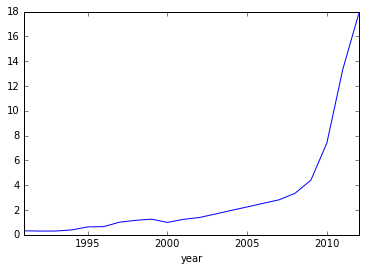

In [7]:
sisal_data.groupby('country').apply(normalize).mean(level=1).plot()